In [29]:
#importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib

1-collecte et préparation des données

In [30]:
#téléchargement des données
df = pd.read_csv("credit_risk_dataset.csv", sep=";")
#affichage des 5 prémières lignes du dataset
df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [31]:
#affichage des types de variables
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

mon dataset contient 8 variables de types numériques et 4 variables objet

In [32]:
#identification des valeurs manquantes
nbr_val_duplicated = df.duplicated().sum()
nbr_val_duplicated

165

il y a 165 doublons

In [33]:
#suppression des doublons
df.drop_duplicates(keep = 'first', inplace=True)
print(df.duplicated().sum())


0


il n' y a plus de doublon

In [34]:
#valeurs manquantes
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

il y a 887 valeurs manquantes au niveau  person_emp_length et 3095 valeurs manquantes au dans la colonne loan_int_rate.on procède de manière suivante pour l'imputation:
Tout d'abord, nous appliquons la fonction d'imputation:
    Ensuite, nous calculons le RMSE à l'aide de notre fonction personnalisée RMSE()
    Enfin, nous traçons les données pour obtenir une impression visuelle des performances de l'algorithme d'imputation.
Mais je vais partir sur la base de la médiane ce qui est couramment fait etant donné qu'il n'y a pas assez de temps pour le projet 

IMPUTATION PAR LA MEDIANE

In [35]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
#vérification
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [37]:
#transformation des variables catégorielles en variables numériques
# Séparer des colonnes
cat_cols = df.select_dtypes(include='object').columns
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]  # 2 valeurs
multi_cols = [col for col in cat_cols if df[col].nunique() > 2]  # Plus de 2 valeurs

# One-Hot Encoding pour les colonnes binaires
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)

# Label Encoding pour les colonnes multi-catégorielles
for col in multi_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
print(df)


       person_age  person_income  person_home_ownership  person_emp_length  \
0              22          59000                      3              123.0   
1              21           9600                      2                5.0   
2              25           9600                      0                1.0   
3              23          65500                      3                4.0   
4              24          54400                      3                8.0   
...           ...            ...                    ...                ...   
32576          57          53000                      0                1.0   
32577          54         120000                      0                4.0   
32578          65          76000                      3                3.0   
32579          56         150000                      0                5.0   
32580          66          42000                      3                2.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_

Normalisation des données

In [38]:
scaler = MinMaxScaler().fit(df)
df_scaled =scaler.transform(df)
print (df_scaled)


[[1.61290323e-02 9.17278185e-03 1.00000000e+00 ... 7.10843373e-01
  3.57142857e-02 1.00000000e+00]
 [8.06451613e-03 9.33955971e-04 6.66666667e-01 ... 1.20481928e-01
  0.00000000e+00 0.00000000e+00]
 [4.03225806e-02 9.33955971e-04 0.00000000e+00 ... 6.86746988e-01
  3.57142857e-02 0.00000000e+00]
 ...
 [3.62903226e-01 1.20080053e-02 1.00000000e+00 ... 5.54216867e-01
  9.28571429e-01 0.00000000e+00]
 [2.90322581e-01 2.43495664e-02 0.00000000e+00 ... 1.20481928e-01
  8.57142857e-01 0.00000000e+00]
 [3.70967742e-01 6.33755837e-03 1.00000000e+00 ... 1.80722892e-01
  1.00000000e+00 0.00000000e+00]]


Repartition des données en train et test.Mais avant je fais un splitting c'est-à-dire je precise mes variables caractéristiques et ma variable cible

In [39]:
#variable caractéristique
x=df.drop("loan_status",axis=1)
y =df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


2-ANALYSE EXPLORATOIRE ET VISUALISATION

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


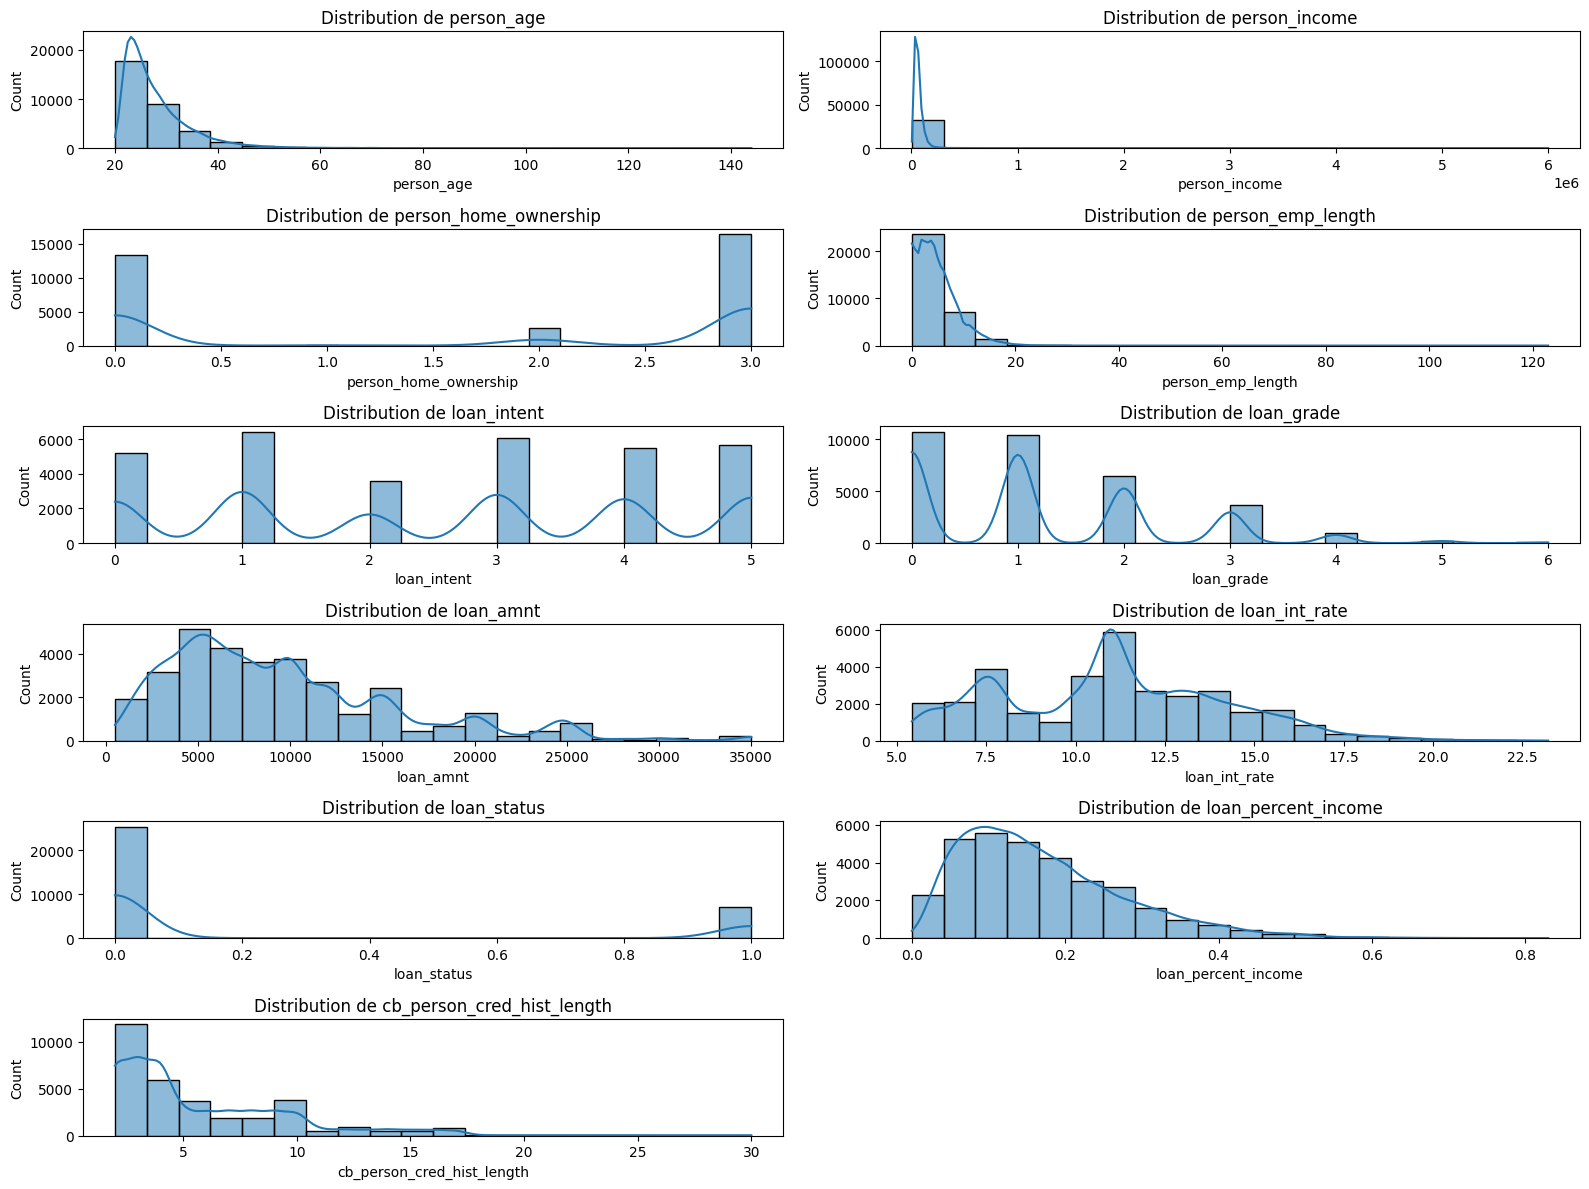

In [40]:
# Obtenir les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols )

# Initialiser une figure pour afficher les graphiques
plt.figure(figsize=(16, 12))

# Créer des histogrammes pour chaque variable numérique
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)  # Ajuste la disposition selon le nombre de variables
    sns.histplot(df[col], kde=True, bins=20)  # Utiliser kde=True pour ajouter la courbe de densité
    plt.title(f'Distribution de {col}')

plt.tight_layout()
plt.show()


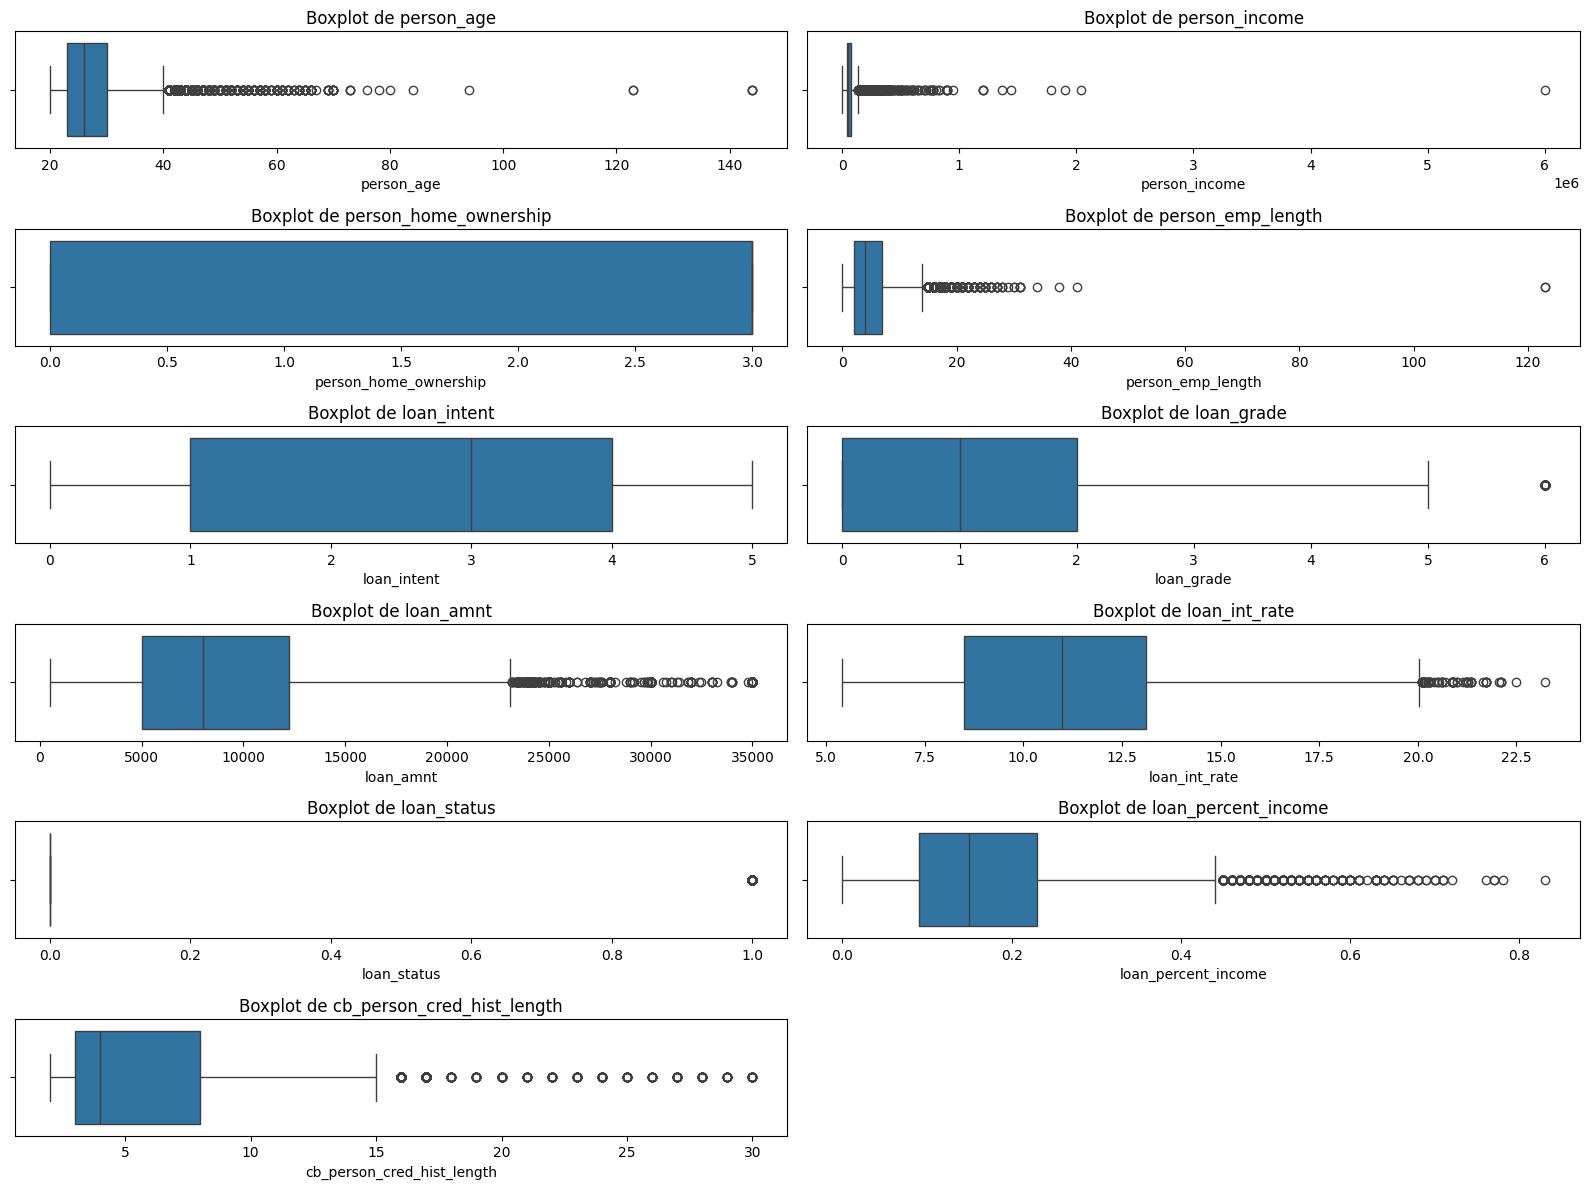

In [41]:
# Obtenir les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Initialiser une figure pour afficher les graphiques
plt.figure(figsize=(16, 12))

# Créer des boxplots pour chaque variable numérique
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i)  # Ajuste la disposition selon le nombre de variables
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


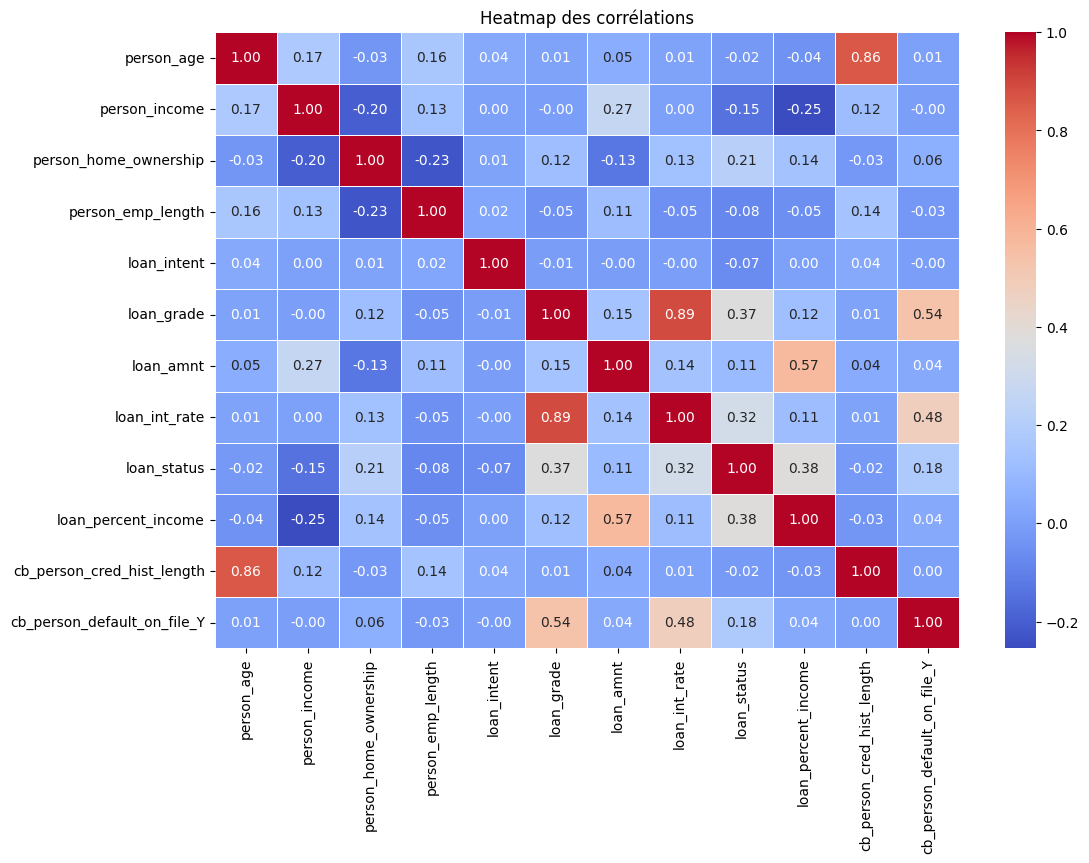

In [42]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Créer la heatmap
plt.figure(figsize=(12, 8))  # Définir la taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Heatmap des corrélations')
plt.show()


In [43]:
#entrainement du modèle de regression logistique
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
#entrainement du modèle de l'arbre de décision 
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:

# Prédictions sur l'ensemble de test
logreg_preds = logreg_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

# Calcul des métriques pour le modèle de régression logistique
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_recall = recall_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds)
logreg_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])

# Calcul des métriques pour l'arbre de décision
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_recall = recall_score(y_test, tree_preds)
tree_f1 = f1_score(y_test, tree_preds)
tree_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1])

# Affichage des résultats
print(f"Régression Logistique - Accuracy: {logreg_accuracy:.4f}, Recall: {logreg_recall:.4f}, F1-Score: {logreg_f1:.4f}, AUC-ROC: {logreg_auc:.4f}")
print(f"Arbre de Décision - Accuracy: {tree_accuracy:.4f}, Recall: {tree_recall:.4f}, F1-Score: {tree_f1:.4f}, AUC-ROC: {tree_auc:.4f}")

# Matrice de confusion pour chaque modèle
print("Matrice de confusion (Logistique):")
print(confusion_matrix(y_test, logreg_preds))
print("Matrice de confusion (Arbre de Décision):")
print(confusion_matrix(y_test, tree_preds))

# Rapport de classification
print("Rapport de classification (Logistique):")
print(classification_report(y_test, logreg_preds))
print("Rapport de classification (Arbre de Décision):")
print(classification_report(y_test, tree_preds))


Régression Logistique - Accuracy: 0.8035, Recall: 0.1660, F1-Score: 0.2726, AUC-ROC: 0.7557
Arbre de Décision - Accuracy: 0.8828, Recall: 0.7579, F1-Score: 0.7414, AUC-ROC: 0.8381
Matrice de confusion (Logistique):
[[7456  113]
 [1798  358]]
Matrice de confusion (Arbre de Décision):
[[6951  618]
 [ 522 1634]]
Rapport de classification (Logistique):
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      7569
           1       0.76      0.17      0.27      2156

    accuracy                           0.80      9725
   macro avg       0.78      0.58      0.58      9725
weighted avg       0.80      0.80      0.75      9725

Rapport de classification (Arbre de Décision):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7569
           1       0.73      0.76      0.74      2156

    accuracy                           0.88      9725
   macro avg       0.83      0.84      0.83      9725
wei

1. Accuracy (Précision) :

    Régression Logistique : 80.35%
    Arbre de Décision : 88.28%

Analyse : L'Arbre de Décision présente une précision plus élevée que la régression logistique. Cela indique que, dans l'ensemble, l'Arbre de Décision a tendance à faire moins d'erreurs globalement, ce qui peut être dû à sa capacité à capturer des relations non linéaires et des interactions complexes entre les variables.
2. Recall (Rappel) :

    Régression Logistique : 16.60%
    Arbre de Décision : 75.79%

Analyse : Le Rappel mesure la capacité du modèle à identifier correctement les clients risqués (classe 1). L'Arbre de Décision a un rappel beaucoup plus élevé, ce qui signifie qu'il est bien meilleur pour détecter les clients risqués. En revanche, la régression logistique ne détecte que 16.6% des clients risqués, ce qui pourrait être problématique si la priorité est d'éviter de laisser passer des clients à risque.
3. F1-Score :

    Régression Logistique : 27.26%
    Arbre de Décision : 74.14%

Analyse : Le F1-score combine la précision et le rappel. Il est particulièrement utile quand il y a un déséquilibre dans les classes. L'Arbre de Décision présente un F1-score bien supérieur, ce qui signifie qu'il atteint un meilleur compromis entre la précision et le rappel. La régression logistique, bien que relativement précise pour la classe 0 (non risqué), souffre d'un faible rappel pour la classe 1 (risqué), d'où un faible F1-score.
4. AUC-ROC :

    Régression Logistique : 0.7557
    Arbre de Décision : 0.8381

Analyse : L'AUC-ROC mesure la capacité globale du modèle à distinguer entre les classes (risqué vs non-risqué). L'Arbre de Décision a une AUC supérieure, ce qui signifie qu'il a une meilleure capacité à séparer les classes, même si l'accuracy est relativement proche de celle de la régression logistique.
5. Matrice de Confusion :

Les matrices de confusion donnent une vue plus détaillée de la performance des modèles :

    Régression Logistique :
        Vrais négatifs (classés correctement comme non risqués) : 7456
        Faux positifs (classés incorrectement comme risqués) : 113
        Faux négatifs (classés incorrectement comme non risqués) : 1798
        Vrais positifs (classés correctement comme risqués) : 358

    Arbre de Décision :
        Vrais négatifs : 6951
        Faux positifs : 618
        Faux négatifs : 522
        Vrais positifs : 1634

Analyse :

    L'Arbre de Décision a un nombre plus élevé de vrais positifs (1634) et un nombre beaucoup plus faible de faux négatifs (522), ce qui est un bon indicateur qu'il identifie mieux les clients risqués.
    La régression logistique, quant à elle, a un nombre plus élevé de faux négatifs (1798), ce qui signifie qu'elle rate un grand nombre de clients risqués, ce qui peut être un problème majeur si l'objectif est de minimiser les risques.

6. Rapport de classification :

    Régression Logistique :
        Précision : 81% pour la classe 0 et 76% pour la classe 1.
        Rappel : 99% pour la classe 0 et 17% pour la classe 1.
        F1-score : 89% pour la classe 0 et 27% pour la classe 1.

    Arbre de Décision :
        Précision : 93% pour la classe 0 et 73% pour la classe 1.
        Rappel : 92% pour la classe 0 et 76% pour la classe 1.
        F1-score : 92% pour la classe 0 et 74% pour la classe 1.

Analyse :

    L'Arbre de Décision présente une meilleure précision, un meilleur rappel et un meilleur F1-score pour la classe 1 (risqué), ce qui en fait un modèle plus équilibré dans la gestion des deux classes (risqué et non risqué).
    La régression logistique est très précise pour la classe 0 (non risqué), mais elle a de grandes difficultés à détecter les clients risqués (classe 1), ce qui est reflété par un faible rappel et un faible F1-score pour cette classe.

Conclusion :

    L'Arbre de Décision est clairement supérieur pour la détection des clients risqués grâce à son rappel élevé et son F1-score plus élevé, ce qui est crucial dans des scénarios où le coût des faux négatifs (ignorer un client risqué) est élevé.
    La régression logistique offre de bonnes performances globales, mais elle est moins efficace pour détecter les clients risqués. l'Arbre de Décision serait probablement le meilleur choix,Si je me  concentre  sur la détection des risques (clients risqués). 

In [28]:


# Sauvegarde du modèle
joblib.dump(tree_model, 'decision_tree_model.joblib')


['decision_tree_model.joblib']